# [TITLE OF EXERCISE]

In this exercise, we'll move toward using RViz.RViz is a 3D visualizer that allows you to view sensor and state information. We use RViz to model our robots before we use actual hardware.

## Starting RViz

Starting RViz as a program is very simple. You can quite easily do it by running the following line of code. Before doing this make sure that roscore is running.

In [ ]:
rosrun rviz rviz

A new window that looks like the following should have appeared. If there was an error, check the errors section below.

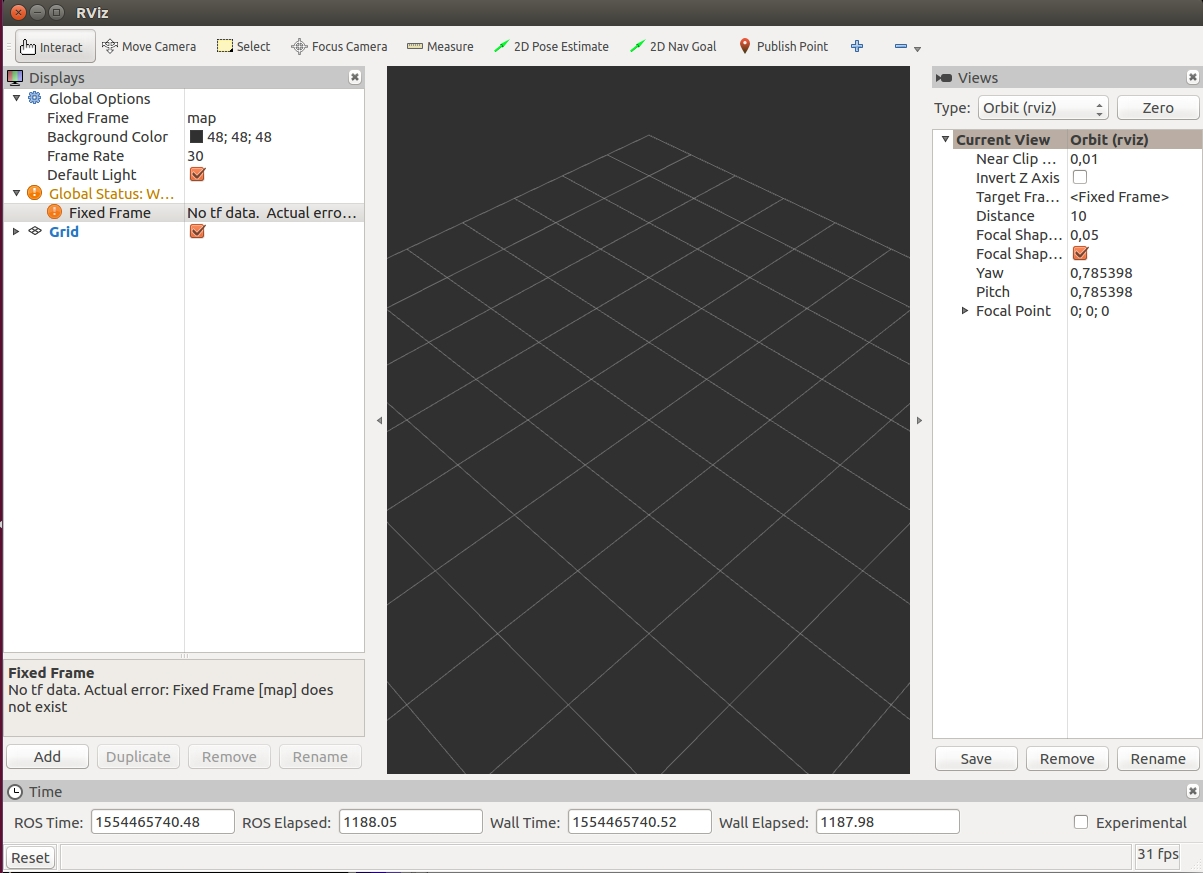



## Errors

